In [5]:
from sklearn import tree
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(os.path.join("Resources/healthcare-dataset-stroke-data_nochild.csv"))
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
mean_value=df['bmi'].mean()
df['bmi_ave']=df['bmi'].fillna(mean_value)

In [8]:
target = df["stroke"]
target_names = ["negative", "positive"]
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_ave
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,36.600000
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,30.421719
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,32.500000
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,34.400000
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,24.000000


In [9]:
encoded_df = pd.get_dummies(df, columns=['gender','ever_married', 'Residence_type'])
encoded_df

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_ave,gender_Female,gender_Male,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban
0,67,0,1,Private,228.69,36.6,formerly smoked,1,36.600000,0,1,0,1,0,1
1,61,0,0,Self-employed,202.21,NaN,never smoked,1,30.421719,1,0,0,1,1,0
2,80,0,1,Private,105.92,32.5,never smoked,1,32.500000,0,1,0,1,1,0
3,49,0,0,Private,171.23,34.4,smokes,1,34.400000,1,0,0,1,0,1
4,79,1,0,Self-employed,174.12,24.0,never smoked,1,24.000000,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4308,80,1,0,Private,83.75,NaN,never smoked,0,30.421719,1,0,0,1,0,1
4309,81,0,0,Self-employed,125.20,40.0,never smoked,0,40.000000,1,0,0,1,0,1
4310,35,0,0,Self-employed,82.99,30.6,never smoked,0,30.600000,1,0,0,1,1,0
4311,51,0,0,Private,166.29,25.6,formerly smoked,0,25.600000,0,1,0,1,1,0


In [10]:
encoded_stroke_df = encoded_df.drop(columns=['gender_Female','ever_married_No','Residence_type_Rural'])
encoded_stroke_df

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_ave,gender_Male,ever_married_Yes,Residence_type_Urban
0,67,0,1,Private,228.69,36.6,formerly smoked,1,36.600000,1,1,1
1,61,0,0,Self-employed,202.21,NaN,never smoked,1,30.421719,0,1,0
2,80,0,1,Private,105.92,32.5,never smoked,1,32.500000,1,1,0
3,49,0,0,Private,171.23,34.4,smokes,1,34.400000,0,1,1
4,79,1,0,Self-employed,174.12,24.0,never smoked,1,24.000000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4308,80,1,0,Private,83.75,NaN,never smoked,0,30.421719,0,1,1
4309,81,0,0,Self-employed,125.20,40.0,never smoked,0,40.000000,0,1,1
4310,35,0,0,Self-employed,82.99,30.6,never smoked,0,30.600000,0,1,0
4311,51,0,0,Private,166.29,25.6,formerly smoked,0,25.600000,1,1,0


In [11]:
#data.gender[data.gender == 'Male'] = 1
#data.gender[data.gender == 'Female'] = 2

#data.ever_married[data.ever_married == 'Yes'] = 1
#data.ever_married[data.ever_married == 'No'] = 2

encoded_stroke_df.work_type[encoded_stroke_df.work_type == 'Private'] = 1
encoded_stroke_df.work_type[encoded_stroke_df.work_type == 'Self-employed'] = 2
encoded_stroke_df.work_type[encoded_stroke_df.work_type == 'Govt_job'] = 3
encoded_stroke_df.work_type[encoded_stroke_df.work_type == 'Never_worked'] = 4

#data.Residence_type[data.Residence_type == 'Urban'] = 1
#data.Residence_type[data.Residence_type == 'Rural'] = 2

encoded_stroke_df.smoking_status[encoded_stroke_df.smoking_status == 'formerly smoked'] = 1
encoded_stroke_df.smoking_status[encoded_stroke_df.smoking_status == 'never smoked'] = 2
encoded_stroke_df.smoking_status[encoded_stroke_df.smoking_status == 'smokes'] = 3
encoded_stroke_df.smoking_status[encoded_stroke_df.smoking_status == 'Unknown'] = 4

encoded_stroke_df.head(10)

<ipython-input-11-e658a5c55188>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_stroke_df.work_type[encoded_stroke_df.work_type == 'Private'] = 1
<ipython-input-11-e658a5c55188>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_stroke_df.work_type[encoded_stroke_df.work_type == 'Self-employed'] = 2
<ipython-input-11-e658a5c55188>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  encoded_stroke_df.work_type[encoded_stroke

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_ave,gender_Male,ever_married_Yes,Residence_type_Urban
0,67,0,1,1,228.69,36.6,1,1,36.600000,1,1,1
1,61,0,0,2,202.21,NaN,2,1,30.421719,0,1,0
2,80,0,1,1,105.92,32.5,2,1,32.500000,1,1,0
3,49,0,0,1,171.23,34.4,3,1,34.400000,0,1,1
4,79,1,0,2,174.12,24.0,2,1,24.000000,0,1,0
5,81,0,0,1,186.21,29.0,1,1,29.000000,1,1,1
6,74,1,1,1,70.09,27.4,2,1,27.400000,1,1,0
7,69,0,0,1,94.39,22.8,2,1,22.800000,0,0,1
8,59,0,0,1,76.15,NaN,4,1,30.421719,0,1,0
9,78,0,0,1,58.57,24.2,4,1,24.200000,0,1,1


In [12]:
data = encoded_stroke_df.drop("stroke", axis=1)
feature_names = data.columns
data.head(10)

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,bmi_ave,gender_Male,ever_married_Yes,Residence_type_Urban
0,67,0,1,1,228.69,36.6,1,36.600000,1,1,1
1,61,0,0,2,202.21,NaN,2,30.421719,0,1,0
2,80,0,1,1,105.92,32.5,2,32.500000,1,1,0
3,49,0,0,1,171.23,34.4,3,34.400000,0,1,1
4,79,1,0,2,174.12,24.0,2,24.000000,0,1,0
5,81,0,0,1,186.21,29.0,1,29.000000,1,1,1
6,74,1,1,1,70.09,27.4,2,27.400000,1,1,0
7,69,0,0,1,94.39,22.8,2,22.800000,0,0,1
8,59,0,0,1,76.15,NaN,4,30.421719,0,1,0
9,78,0,0,1,58.57,24.2,4,24.200000,0,1,1


In [13]:
data = data.drop("bmi", axis=1)
feature_names = data.columns
data.head(10)

,age,hypertension,heart_disease,work_type,avg_glucose_level,smoking_status,bmi_ave,gender_Male,ever_married_Yes,Residence_type_Urban
0,67,0,1,1,228.69,1,36.600000,1,1,1
1,61,0,0,2,202.21,2,30.421719,0,1,0
2,80,0,1,1,105.92,2,32.500000,1,1,0
3,49,0,0,1,171.23,3,34.400000,0,1,1
4,79,1,0,2,174.12,2,24.000000,0,1,0
5,81,0,0,1,186.21,1,29.000000,1,1,1
6,74,1,1,1,70.09,2,27.400000,1,1,0
7,69,0,0,1,94.39,2,22.800000,0,0,1
8,59,0,0,1,76.15,4,30.421719,0,1,0
9,78,0,0,1,58.57,4,24.200000,0,1,1


In [14]:
#data=data[data.smoking_status != '4']
#data


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [16]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8869323447636701

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9341983317886933

In [18]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.2821056506501149, 'avg_glucose_level'),
 (0.2399759738586572, 'bmi_ave'),
 (0.2265926997695885, 'age'),
 (0.06719439372976455, 'smoking_status'),
 (0.05043941506701117, 'work_type'),
 (0.032860251507448854, 'Residence_type_Urban'),
 (0.03165237889623465, 'gender_Male'),
 (0.023938688801402725, 'heart_disease'),
 (0.02377979482603828, 'hypertension'),
 (0.021460752893739388, 'ever_married_Yes')]

In [19]:
predictions = rf.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [20]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1074,0,0
1075,0,0
1076,0,0
1077,0,0


In [21]:
sum(predictions)

0

In [22]:
confusion_matrix=confusion_matrix(y_test,predictions)
print(confusion_matrix)

[[1008    0]
 [  71    0]]


<ipython-input-23-98adfcc272bc>:14: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_stroke = confusion_matrix[1,1] / sum(confusion_matrix[:,1])


Text(0.5, 1.0, 'Random Forest model')

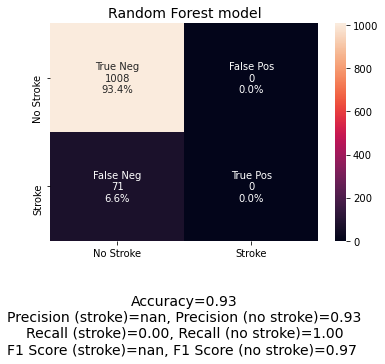

In [23]:
#Create an informative confusion matrix using seaborn
#Define variables for Information inside each box
category = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
counts = ['{0:0.0f}'.format(value) for value in confusion_matrix.flatten()]
percentages = ['{0:.1%}'.format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(category, counts, percentages)]
#Convert all of the labels to an array and reshape
labels = np.asarray(labels).reshape(2,2)
#Change the 0,1 to no stroke and stroke for labels
tick_labels = ['No Stroke', 'Stroke']
#Calculate all of the values to be displayed underneath the matrix as xlabel. Calculate precision, recall, F1 for both
#stroke and no stroke
accuracy  = np.trace(confusion_matrix) / float(np.sum(confusion_matrix))
precision_stroke = confusion_matrix[1,1] / sum(confusion_matrix[:,1])
recall_stroke    = confusion_matrix[1,1] / sum(confusion_matrix[1,:])
f1_score_stroke  = 2*precision_stroke*recall_stroke / (precision_stroke + recall_stroke)
precision = confusion_matrix[0,0] / sum(confusion_matrix[:,0])
recall    = confusion_matrix[0,0] / sum(confusion_matrix[0,:])
f1_score  = 2*precision*recall / (precision + recall)
#Set up the text for the x label display underneath the matrix
stats_text = "\n\nAccuracy={:0.2f}\nPrecision (stroke)={:0.2f}, Precision (no stroke)={:0.2f}\nRecall (stroke)={:0.2f}, Recall (no stroke)={:0.2f}\nF1 Score (stroke)={:0.2f}, F1 Score (no stroke)={:0.2f} ".format(accuracy,precision_stroke, precision, recall_stroke, recall, f1_score_stroke, f1_score)
#Make the seaborn heatmap
sns.heatmap(confusion_matrix, annot = labels, fmt = '', xticklabels = tick_labels, yticklabels = tick_labels)
plt.xlabel(stats_text, fontsize = 14)
plt.title("Random Forest model", fontsize = 14)